In [1]:
import numpy as np
import sympy as sp

In [2]:
#set up anderson model
system_orbitals = 1 # odd-even represent spin up and down
spin_obitals = 1 # odd-even represent spin up and down    
modes = 1 # exponential decomposition
total_qubits = system_orbitals*2 + spin_obitals*modes*2 + 1
print(total_qubits)

5


In [3]:
from functools import reduce
from encode import JWT_Encode
H_op = JWT_Encode(1)
dicts = [H_op.num_op(0, 4)]
H = reduce(lambda x, y: {k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y)}, dicts)
print(H)

{'I': 2.0, 'Z': -2.0}


In [4]:
# etal = np.loadtxt('etal1_1', dtype=complex)
etal = np.array([1], dtype=complex)
etar = etal.conjugate()
eta = np.vstack((etal, etar))
gammal = np.array([1], dtype=complex)
gammal = np.loadtxt('expn1_1', dtype=complex)
gamma = np.vstack((gammal, gammal.conjugate()))
zetal = np.sqrt((etal + etar) / 2)
zeta = np.vstack((zetal, zetal.conjugate()))
print(eta)
print(gamma)
print(zeta)

[[1.+0.j]
 [1.-0.j]]
[[1.       +0.j 0.8660254+0.j]
 [1.       -0.j 0.8660254-0.j]]
[[1.+0.j]
 [1.-0.j]]


In [5]:
#evolution parameters
epsilon = 0.05
tau = 0.05

In [6]:
from qiskit.quantum_info import Statevector
initialstate = Statevector.from_label('00110')

In [7]:
from evolution import Evolution
DQME = Evolution(sys_qubits=system_orbitals, diss_qubits=spin_obitals,
                 modes=modes, H=H, gamma=gamma, eta=eta, zeta=zeta, 
                 epsilon=epsilon, tau=tau)
H_matrix = DQME.pauli_to_hermi(H, 1)
print(H_matrix)

[[0.+0.j 0.+0.j]
 [0.+0.j 4.+0.j]]


In [8]:
steps = 199
result = DQME.dynamics_run(initial=initialstate, steps=steps)

100%|██████████| 199/199 [02:33<00:00,  1.30it/s]


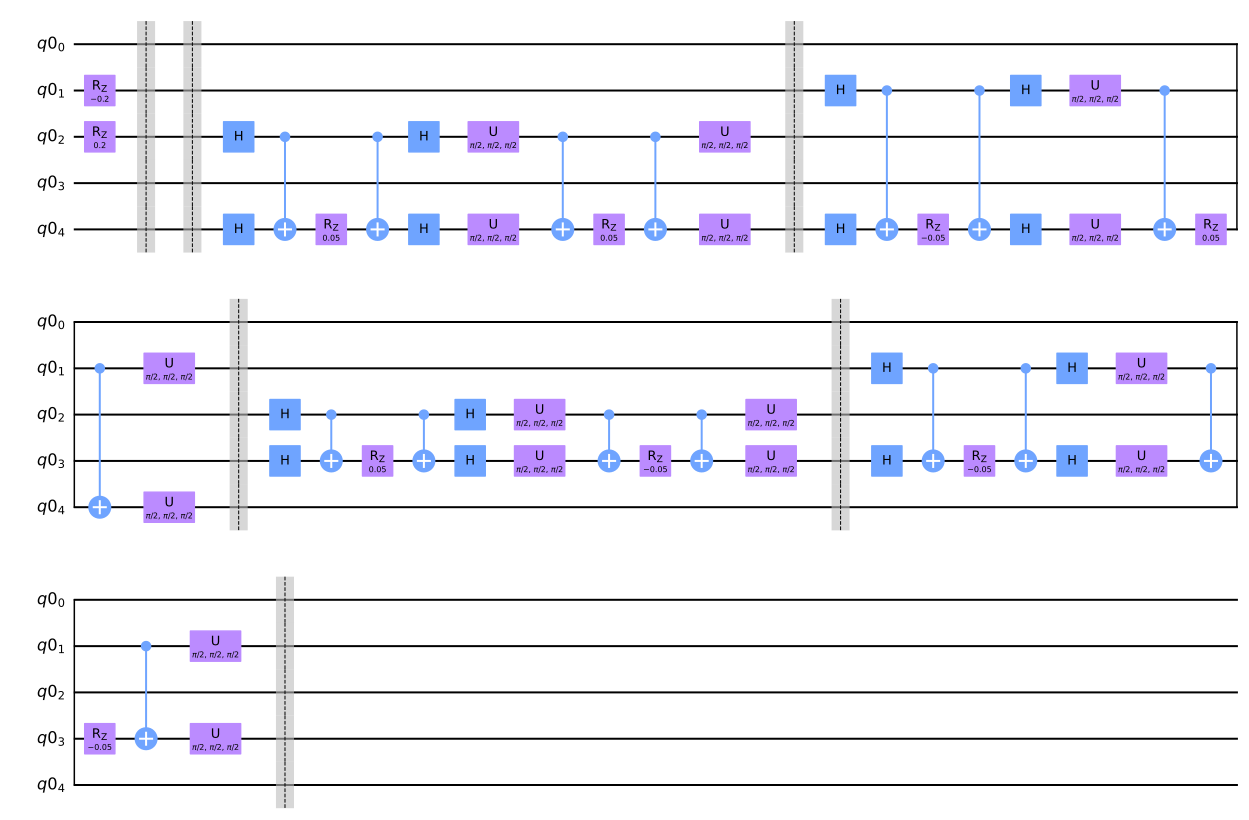

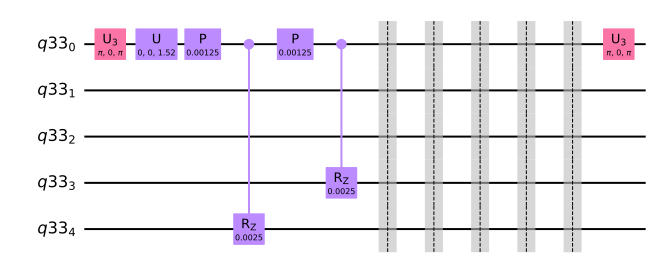

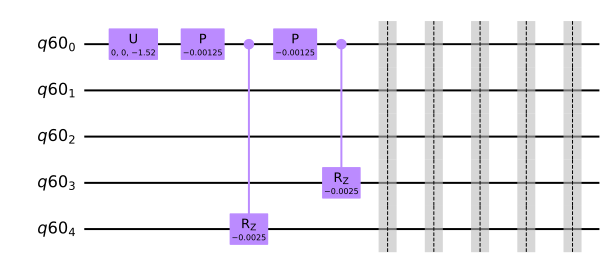

In [9]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit 

Ua_qc = DQME.UA_circuit.decompose()
Us_qc = DQME.US_circuit.decompose()
Ud_qc = DQME.USdagger_circuit.decompose()
display(Ua_qc.draw())
display(Us_qc.draw())
display(Ud_qc.draw())

In [10]:
from data import rdo_anderson, rho_tilde

rho_qubits = system_orbitals*2
rdo = []
for i in range(steps+1):
    statevector = rho_tilde(result[i], total_qubits)
    rdo.append(rdo_anderson(statevector, rho_qubits))

rdo_dict = {}
for i in range(steps+1):
    label = str(i)       
    rdo_dict[label] = rdo[i]
np.savez('rdo.npz', **rdo_dict)